In [20]:
# LIBRARIES USED IN THIS PROJECT

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation and metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Oversampling
from imblearn.over_sampling import SMOTE

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Model exporting
import joblib  # or use pickle

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)



### Data Loading and Initial Exploration
The Telco Customer Churn dataset is loaded and explored to understand its structure. The first few rows are displayed, followed by a review of data types, summary statistics, and the number of unique values per column. Missing values and duplicate records are identified to highlight any potential data quality issues. These insights inform the subsequent preprocessing steps.



In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/amharringthon/IBM-Telco-Churn-Prediction/refs/heads/main/data/Telco_customer_churn.csv")
df.head() # Displaying the first 5 rows of the dataset to get an overview

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [22]:
# Display information about the dataset, including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Info output observations:

- The dataset contains 7,043 rows and 33 columns.
- There are 24 categorical (object) columns, 6 integer, and 3 float columns.
- The column Total Charges is stored as an object instead of a numeric type. This should be converted to float for analysis.


In [23]:
# Display summary statistics for numerical columns: This includes count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


Describe output observations:

- Tenure Months ranges from 0 to 72, indicating customer tenure in months (up to 6 years).
- Monthly Charges vary widely, ranging from approximately $18 to $119.
- Churn Value is binary (0 or 1), confirming it can be used as the target variable.
- Churn Score and CLTV are continuous numeric features that may serve as inputs for segmentation or predictive modeling.

In [24]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

Nunique output observations:

- CustomerID has 7,043 unique values, as expected—serving as a unique identifier.
- Count, Country, and State have only 1 unique value each; these columns provide no variability and can be dropped.
- City, Zip Code, Lat Long, Latitude, and Longitude have very high cardinality. While they may be useful for geo-based segmentation, they are likely too granular for most modeling purposes.
- Gender, Senior Citizen, Partner, and Dependents are binary categorical features with 2 distinct values.
- Variables such as Multiple Lines, Internet Service, Online Security, etc., have 3 unique values, likely representing “Yes”, “No”, and “No Internet Service.”
- Contract includes 3 contract types, and Payment Method offers 4 payment options.
- Monthly Charges has 1,585 unique values, indicating it is a continuous numerical variable.
- Total Charges has 6,531 unique values and is currently stored as an object; it should be converted to numeric.
- Churn Label and Churn Value are binary target variables in categorical and numerical formats, respectively.
- Churn Reason includes 20 unique values. Although some entries are missing, the column may provide value for interpretation or visual analysis.

In [25]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Isnull output observations:

- Most columns have no missing values, indicating that the dataset is generally clean and well-prepared.
- Only Churn Reason contains missing values: 5,174 out of 7,043 rows.
- This suggests that Churn Reason is only available for customers who have churned, and may serve as a post-churn explanatory variable rather than a predictive feature.


In [26]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset. This confirms that each record (customer) is unique — as expected since CustomerID is a unique identifier.

### Data Cleaning
Columns that are either irrelevant for modeling or directly related to the target variable are removed. This includes:

- Columns with no variability (e.g., Count, Country, State)
- High-cardinality or overly granular columns (e.g., Zip Code, Lat Long)
- Identifiers (e.g., CustomerID)
- Columns that reference the target (Churn Value, Churn Reason, Churn Score), as these would leak information into the model and bias the prediction.
- After dropping these columns, the dataset is left with variables that can be used to learn patterns without exposing the model to the answers.

In [27]:
# Drop irrelevant and target-related columns
columns_to_drop = [
    'CustomerID',     # unique identifier
    'Count',          # constant value across all rows
    'Country',        # only one country present
    'State',          # single value
    'Lat Long',       # too granular for modeling
    'Zip Code',       # high cardinality
    'Churn Score',    # score already related to target
    'Churn Reason',   # only available post-churn
    'Churn Value'     # duplicate of target in numeric form
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


The Total Charges column, although numeric in nature, is initially stored as an object. It is converted to a numeric data type, and any resulting missing values are handled by removing the corresponding rows. At the end of this step, the dataset is cleaned, consistent, and ready for exploratory analysis and feature engineering.

In [28]:
# Convert 'Total Charges' to numeric; non-convertible values are set to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check how many missing values were introduced by the conversion
missing_total_charges = df['Total Charges'].isnull().sum()
print(f"Missing values in 'Total Charges' after conversion: {missing_total_charges}")

# Fill missing values in 'Total Charges' with the median to preserve distribution
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

Missing values in 'Total Charges' after conversion: 11


### Exploratory Data Analysis (EDA)
This section explores the key characteristics and distributions of the variables in the dataset, with a focus on identifying potential relationships with customer churn. The analysis includes:

A visualization of churn distribution to understand class imbalance.
Boxplots for numerical variables segmented by churn status to detect trends or outliers.
Count plots for categorical variables, allowing a comparison between churned and retained customers across different service types and customer characteristics.
This step helps uncover initial patterns and guides the selection of features for modeling.



C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3323316410.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=custom_palette)
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3323316410.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent = churn_percent[i]
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\3323316410.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Churn (0)', 'Churn (1)'], fontsize=12)


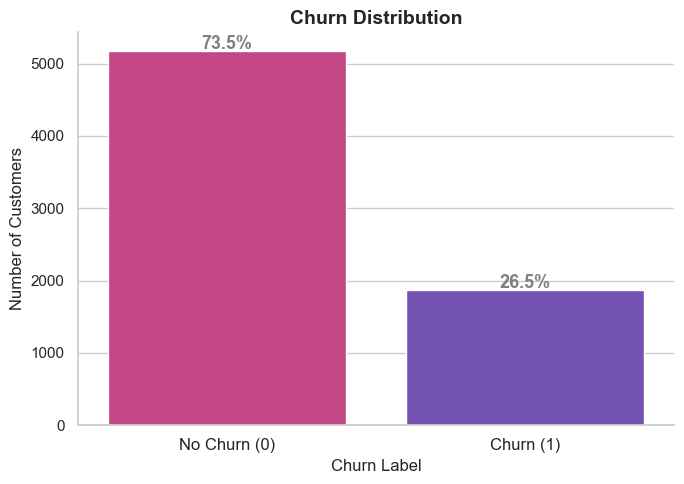

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
churn_counts = df["Churn Label"].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

# Aesthetic plot setup
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")

# Custom colors
custom_palette = ["#D63384", "#6F42C1"]  # pink and purple

# Barplot
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=custom_palette)

# Add percentage labels
for i, count in enumerate(churn_counts.values):
    percent = churn_percent[i]
    ax.text(i, count + 30, f"{percent:.1f}%", ha='center', fontsize=13, fontweight='bold', color='gray')

# Custom ticks and labels
ax.set_xticklabels(['No Churn (0)', 'Churn (1)'], fontsize=12)
ax.set_ylabel("Number of Customers", fontsize=12)
ax.set_xlabel("Churn Label", fontsize=12)
ax.set_title("Churn Distribution", fontsize=14, fontweight='bold')

# Remove top/right spines for cleaner look
sns.despine()
plt.tight_layout()
plt.show()


Observations from the churn distribution plot:
- The bar chart shows the number of customers who have churned (Churn = 1) versus those who have remained (Churn = 0).
- The class distribution is imbalanced, with a noticeably higher proportion of non-churned customers.
- The percentage labels above each bar provide a clear view of the imbalance, which is typical in churn datasets and should be considered during model training (e.g., through resampling or class weighting).


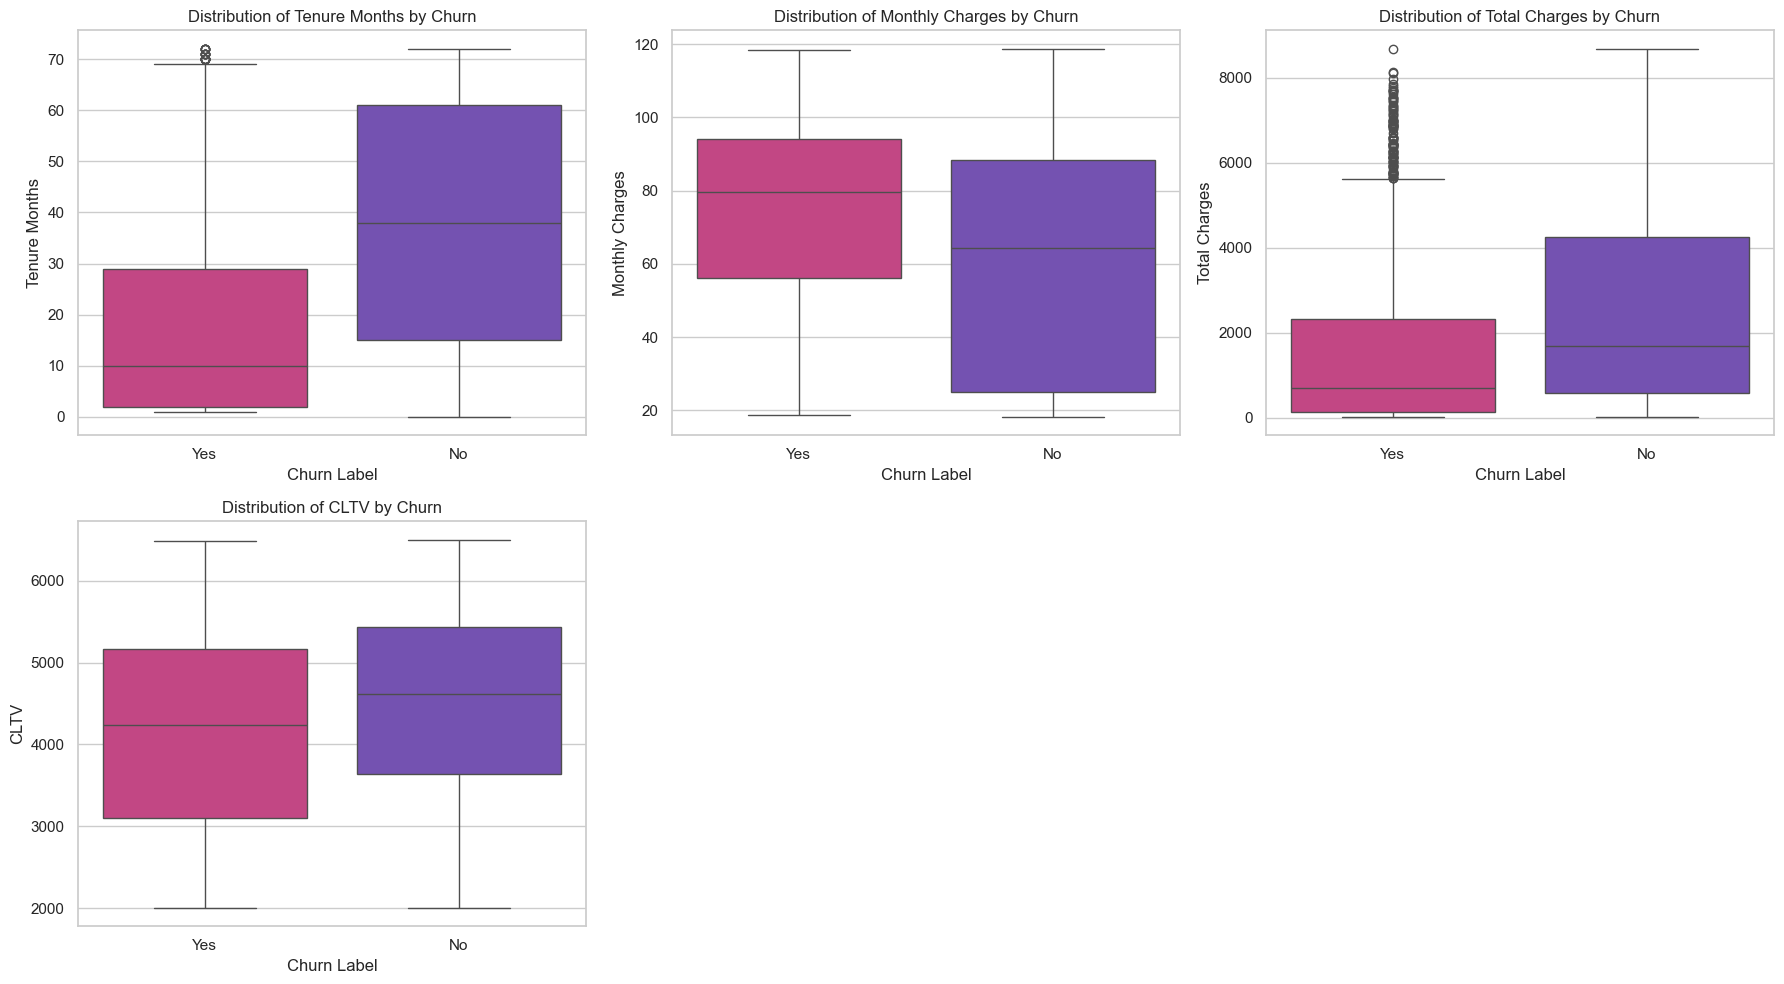

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a pink/purple color theme
custom_palette = ["#D63384", "#6F42C1"]  # Pink and Purple

# Define numerical columns to analyze
numerical_cols = ["Tenure Months", "Monthly Charges", "Total Charges", "CLTV"]

# Define the number of rows and columns for the subplot grid
rows = 2
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column with the corrected hue assignment
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="Churn Label", y=col, data=df, hue="Churn Label", ax=axes[i], palette=custom_palette, legend=False)
    axes[i].set_title(f"Distribution of {col} by Churn", fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Boxplot Observations – Numerical Variables by Churn
- Tenure Months:
Customers who churned tend to have shorter tenure, indicating they stayed with the company for fewer months.
This suggests that newer customers are more likely to churn.

- Monthly Charges:
Churned customers generally face higher monthly charges compared to those who stayed.
This could point to cost sensitivity or dissatisfaction with the perceived value of the service.

- Total Charges:
The total amount charged is lower for churned customers, which aligns with their shorter tenure.
This reinforces the idea that churn often occurs early in the customer lifecycle.

- CLTV (Customer Lifetime Value):
Customers with higher CLTV are less likely to churn, whereas churned customers show lower lifetime value.
This may indicate lower perceived value or reduced engagement with the service.

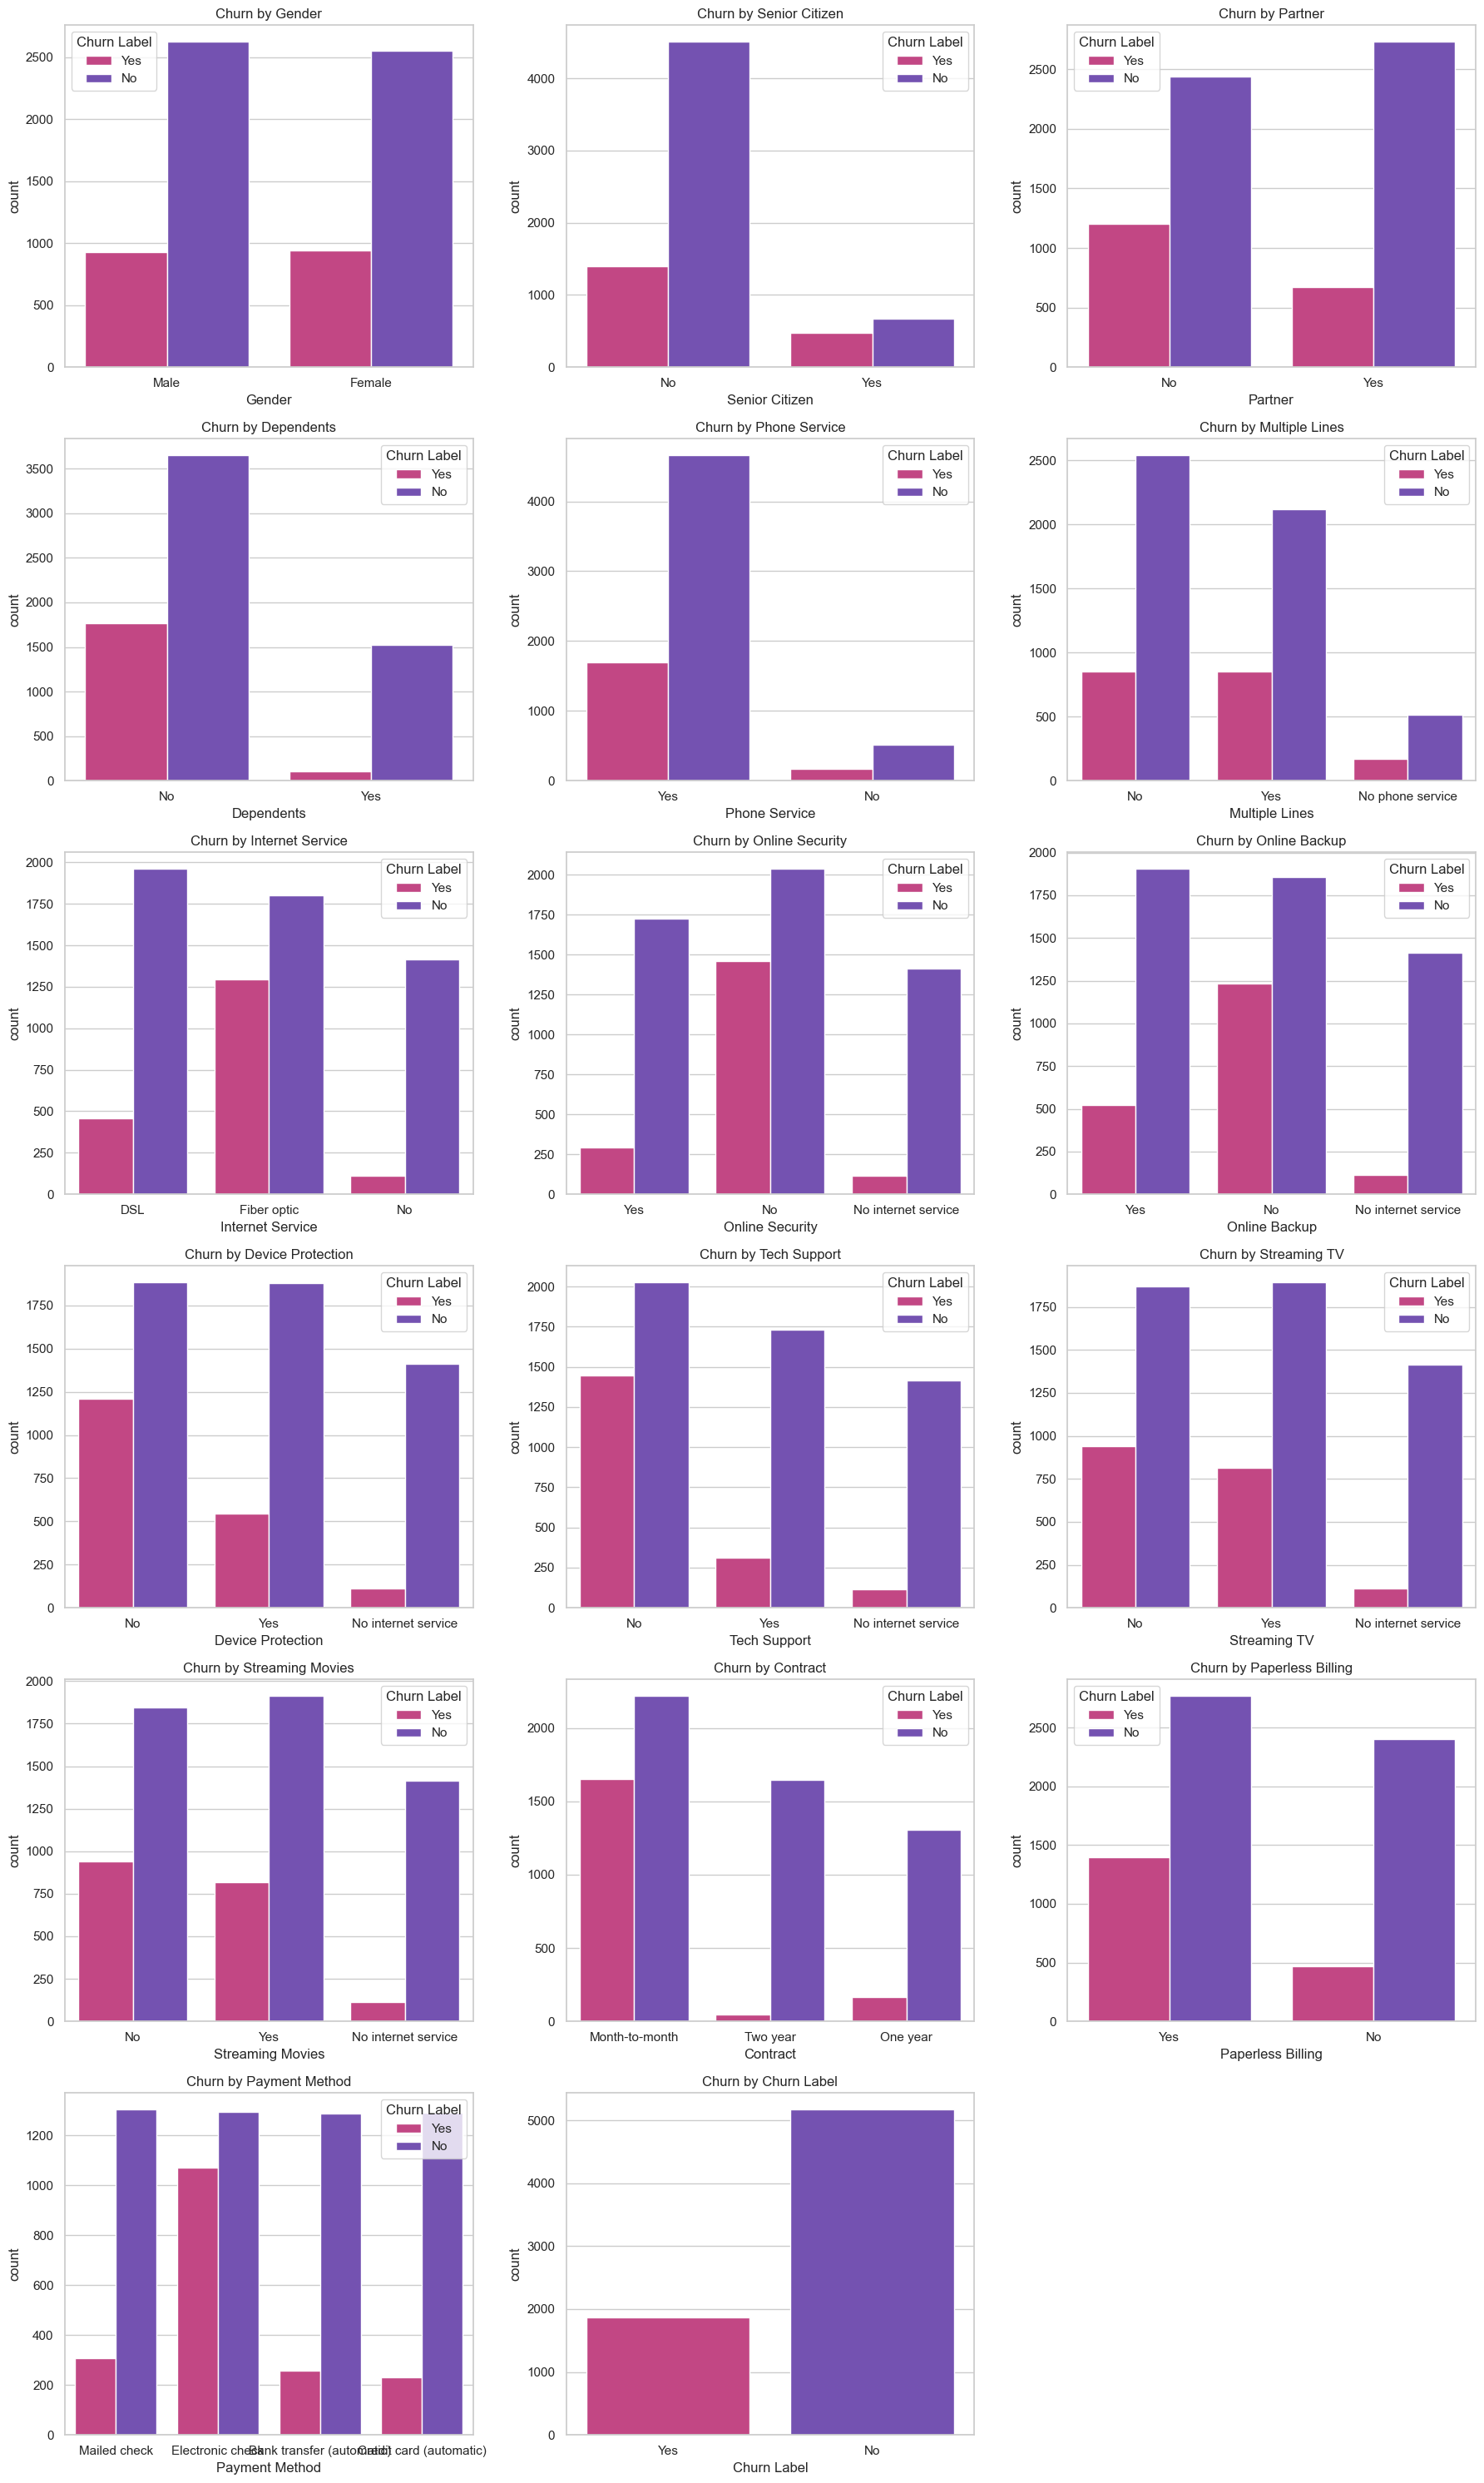

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a pink/purple color theme
custom_palette = ["#D63384", "#6F42C1"]  # Pink and Purple

# Select categorical columns (excluding those with too many unique values)
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Filter out high-cardinality columns (more than 20 unique values)
categorical_cols = [col for col in categorical_cols if df[col].nunique() <= 20]

# Define the number of rows and columns for the subplot grid dynamically
num_plots = len(categorical_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Ensure enough rows
cols = min(3, num_plots)  # Max 3 columns

# Create subplots dynamically based on number of categorical variables
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))  # Adjust size dynamically
axes = axes.flatten()

# Plot countplots for each categorical column with custom colors
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="Churn Label", data=df, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f"Churn by {col}", fontsize=12)  # Pink title
    
    # Rotate labels for better readability if too many categories
    if df[col].nunique() > 5:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### Categorical Feature Distributions by Churn

- Contract Type:
Customers on month-to-month contracts show a significantly higher churn rate compared to those on one-year or two-year contracts.

- Internet Service & Online Security:
Churn is more frequent among customers with no internet service or no online security, suggesting that limited service usage may relate to lower engagement and higher churn.

- Tech Support & Device Protection:
Lack of tech support and device protection is associated with higher churn, possibly indicating unmet support needs or perceived value issues.

- Payment Method:
Customers using electronic check are more likely to churn compared to those using credit card or bank transfer.

- Paperless Billing:
Those who opted for paperless billing exhibit a higher churn rate, which might be linked to a preference for convenience or self-service behavior.

- Multiple Lines & Streaming Services:
Customers without multiple lines or streaming services (TV, movies) may have less engagement with the product ecosystem, which could contribute to churn.

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2844505373.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn Label"] = df["Churn Label"].replace({"No": 0, "Yes": 1}).astype(int)


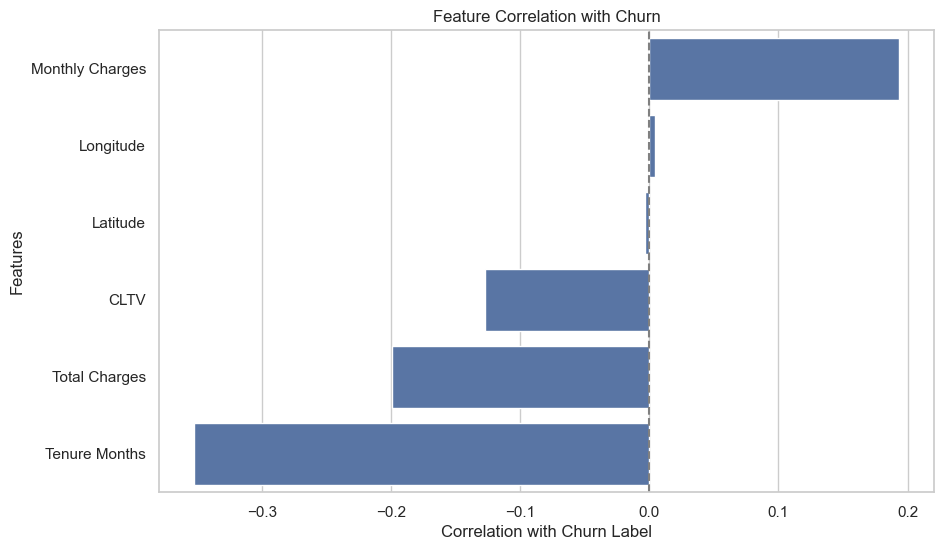

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Churn Label to numeric (0 = No Churn, 1 = Churn)
df["Churn Label"] = df["Churn Label"].replace({"No": 0, "Yes": 1}).astype(int)


# Select only numerical columns
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Extract correlations with Churn Label and sort them
target_corr = corr_matrix["Churn Label"].drop("Churn Label").sort_values(ascending=False)

# Plot correlation as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.xlabel("Correlation with Churn Label")
plt.ylabel("Features")
plt.title("Feature Correlation with Churn")
plt.axvline(x=0, color="gray", linestyle="--")
plt.show()



#### Feature Correlation with Churn – Key Observations
Tenure Months has the strongest negative correlation with churn (~ -0.3)

This confirms that long-term customers are less likely to churn.
Suggests that retention strategies should focus on newer customers, as they are at higher risk.
Monthly Charges has the strongest positive correlation with churn (~ 0.2)

Higher monthly charges increase the likelihood of churn.
This suggests that cost sensitivity may be a significant churn driver.
CLTV (Customer Lifetime Value) has a slight positive correlation (~ 0.1)

A bit counterintuitive, but could suggest that some high-value customers still churn.
Further analysis might be needed to understand if this is due to pricing, competition, or dissatisfaction.
Total Charges has a weak negative correlation (~ -0.1 to -0.2)

Makes sense, as total charges accumulate over time, and customers who churn early will naturally have lower total charges.
However, tenure is a better predictor of churn than total charges.
Latitude & Longitude show negligible correlation with churn (~ 0.0)

This confirms that geographic location does not have a strong impact on customer churn.
These features may not be useful for modeling.

### Model Preprocessing
Before training models, the dataset needs to be properly prepared. This step ensures that all features are in the correct format for machine learning algorithms. The preprocessing steps include:

Feature Selection: Removing unnecessary or redundant columns that do not contribute to churn prediction.
Encoding Categorical Variables: Converting categorical features into numerical format using label encoding and one-hot encoding.
Feature Scaling: Normalizing numerical features using Min-Max Scaling to ensure consistent feature ranges.
These steps enhance model performance and prevent issues related to scale differences and data redundancy. The processed dataset is now ready for training.

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Feature Selection: Remove unnecessary columns
columns_to_drop = [
    "CustomerID", "Count", "Country", "State", "City", "Zip Code",
    "Lat Long", "Latitude", "Longitude", "Churn Score", "Churn Reason", "Churn Value"
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Encoding Categorical Variables
# Convert binary categorical columns (Yes/No → 1/0)
binary_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# Encode Gender (0 = Male, 1 = Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# One-hot encoding for multi-class categorical variables
categorical_cols = [
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Payment Method'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature Scaling (Now all features are numeric)
scaler = MinMaxScaler()
numeric_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Define target variable
y = df["Churn Label"]
X = df.drop(columns=["Churn Label"])


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2032890495.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


In [59]:
#Model training


In [40]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Baseline Model Accuracy: 0.8062

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



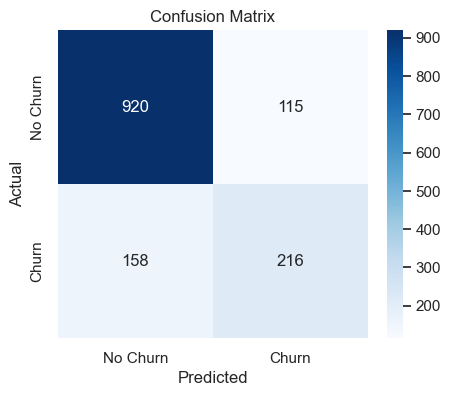

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\5000889.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Abs_Coefficient", y="Feature", data=coef_df.head(15), palette="coolwarm")


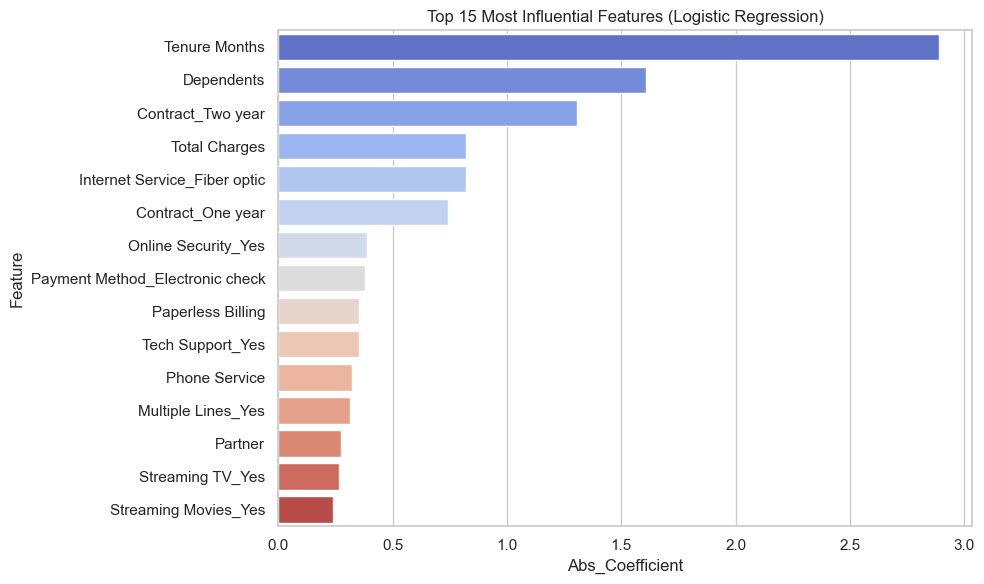

In [42]:
import pandas as pd
import numpy as np

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Crear un DataFrame para visualizar
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df["Abs_Coefficient"] = np.abs(coef_df["Coefficient"])
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

# Mostrar las top 15 más influyentes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="Abs_Coefficient", y="Feature", data=coef_df.head(15), palette="coolwarm")
plt.title("Top 15 Most Influential Features (Logistic Regression)")
plt.tight_layout()
plt.show()


📊 Logistic Regression (SMOTE) - Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\957368673.py:40: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\anaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


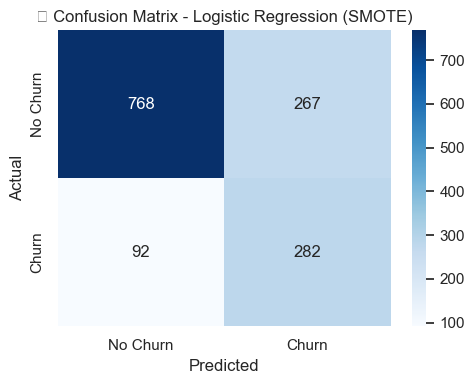

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definir X e y (por si aún no lo hiciste)
X = df.drop(columns=["Churn Label", "Churn Reason"], errors='ignore')
y = df["Churn Label"]

# 2. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# 3. Aplicar SMOTE solo al entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 4. Entrenar modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sm, y_train_sm)

# 5. Predecir en el test set original
y_pred = logreg.predict(X_test)

# ==== 6. Reporte de clasificación ====
print("📊 Logistic Regression (SMOTE) - Classification Report:\n")
print(classification_report(y_test, y_pred))

# ==== 7. Matriz de confusión visual ====
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("🔍 Confusion Matrix - Logistic Regression (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.80269695 0.82327892 0.79985806 0.81605114 0.80681818]
Mean CV score: 0.8097406485902316


In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Rehacer split (por si quieres usar X completo sin modificar)
X = df.drop(columns=["Churn Label", "Churn Reason"], errors='ignore')
y = df["Churn Label"]

# Dividir antes del balanceo para evitar data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE solo en el set de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: Churn Label
0    4139
1    1495
Name: count, dtype: int64
After SMOTE: Churn Label
0    4139
1    4139
Name: count, dtype: int64


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.66      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.76      0.77      1409



In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.69      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



C:\Users\anaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:38:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1074
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📊 LightGBM - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2525461748.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\anaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


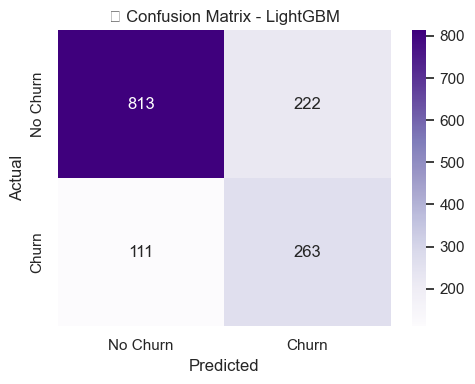

C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2525461748.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15), palette='viridis')
C:\Users\anaha\AppData\Local\Temp\ipykernel_20516\2525461748.py:39: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\anaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


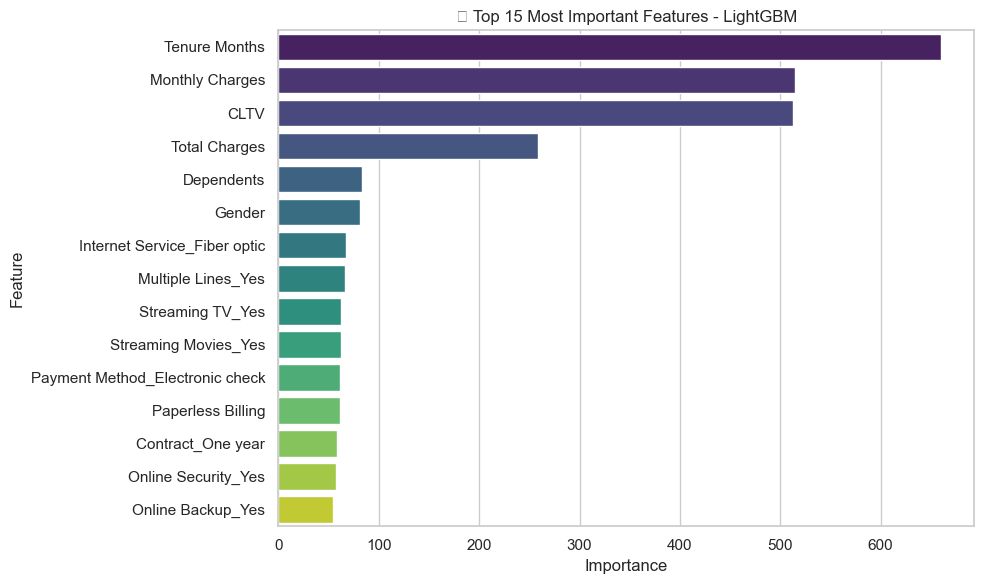

In [48]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Entrenar el modelo
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_sm, y_train_sm)
y_pred_lgbm = lgbm.predict(X_test)

# ==== 1. Classification Report (print en texto) ====
print("📊 LightGBM - Classification Report:\n")
print(classification_report(y_test, y_pred_lgbm))

# ==== 2. Confusion Matrix (visual) ====
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("🔍 Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ==== 3. Feature Importance (bar plot) ====
# Crear DataFrame de importancias
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Mostrar top 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15), palette='viridis')
plt.title("⭐ Top 15 Most Important Features - LightGBM")
plt.tight_layout()
plt.show()


In [ ]:
lgbm.feature_importances_

array([320, 228,  53, ...,  51,  53,  50])

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Búsqueda en grilla
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

# Entrenar sobre los datos sin SMOTE
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_
print("🔍 Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
🔍 Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


📊 Optimized Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.55      0.77      0.64       374

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



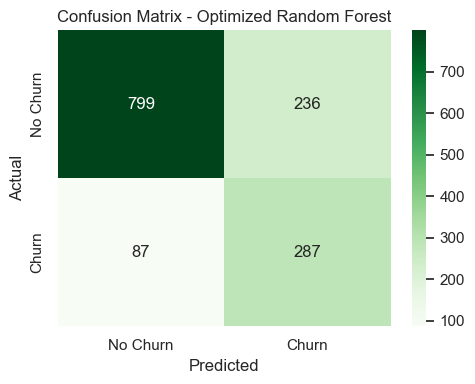

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir
y_pred_best = best_rf.predict(X_test)

# Reporte
print("📊 Optimized Random Forest - Classification Report:\n")
print(classification_report(y_test, y_pred_best))

# Matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener probabilidades de churn (clase 1)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Threshold 0.4
print("🔹 Threshold = 0.4")
y_pred_04 = np.where(y_probs >= 0.4, 1, 0)
print(classification_report(y_test, y_pred_04))

# Threshold 0.35
print("\n🔹 Threshold = 0.35")
y_pred_035 = np.where(y_probs >= 0.35, 1, 0)
print(classification_report(y_test, y_pred_035))


🔹 Threshold = 0.4
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1035
           1       0.51      0.84      0.63       374

    accuracy                           0.74      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.74      0.75      1409


🔹 Threshold = 0.35
              precision    recall  f1-score   support

           0       0.93      0.66      0.78      1035
           1       0.48      0.87      0.62       374

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.72      0.74      1409



In [52]:
import pandas as pd

# Obtener importancia de variables
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Mostrar top 15
top_features = feat_imp.head(15)['Feature'].tolist()
print("🧠 Top 15 features:\n", top_features)


🧠 Top 15 features:
 ['Tenure Months', 'Total Charges', 'Contract_Two year', 'Dependents', 'Monthly Charges', 'Internet Service_Fiber optic', 'CLTV', 'Payment Method_Electronic check', 'Contract_One year', 'Online Security_Yes', 'Tech Support_Yes', 'Paperless Billing', 'Internet Service_No', 'Online Backup_No internet service', 'Online Security_No internet service']


In [53]:
# Filtrar X_train y X_test con top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Entrenar nuevo modelo
rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(X_train_top, y_train)

# Predecir
y_pred_top = rf_top.predict(X_test_top)

# Evaluar
print("📊 Random Forest with top 15 features:\n")
print(classification_report(y_test, y_pred_top))


📊 Random Forest with top 15 features:

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [54]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE con top features
smote = SMOTE(random_state=42)
X_train_top_sm, y_train_sm = smote.fit_resample(X_train_top, y_train)

print("Antes de SMOTE:\n", y_train.value_counts())
print("Después de SMOTE:\n", pd.Series(y_train_sm).value_counts())


Antes de SMOTE:
 Churn Label
0    4139
1    1495
Name: count, dtype: int64
Después de SMOTE:
 Churn Label
0    4139
1    4139
Name: count, dtype: int64


In [55]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al X_train completo
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes de SMOTE:\n", y_train.value_counts())
print("Después de SMOTE:\n", pd.Series(y_train_sm).value_counts())


Antes de SMOTE:
 Churn Label
0    4139
1    1495
Name: count, dtype: int64
Después de SMOTE:
 Churn Label
0    4139
1    4139
Name: count, dtype: int64


✅ SMOTE aplicado:
Antes: {0: 4139, 1: 1495}
Después: {0: 4139, 1: 4139}
📊 Random Forest (All features + SMOTE):

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.66      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.76      0.77      1409



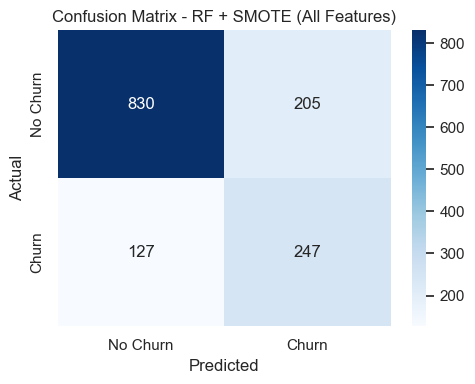

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Aplicar SMOTE al set completo de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("✅ SMOTE aplicado:")
print("Antes:", y_train.value_counts().to_dict())
print("Después:", pd.Series(y_train_sm).value_counts().to_dict())

# 2. Entrenar Random Forest con los datos balanceados
rf_all_smote = RandomForestClassifier(random_state=42)
rf_all_smote.fit(X_train_sm, y_train_sm)

# 3. Predecir en el test set original
y_pred_all = rf_all_smote.predict(X_test)

# 4. Evaluar el modelo
print("📊 Random Forest (All features + SMOTE):\n")
print(classification_report(y_test, y_pred_all))

# 5. Matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_all), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - RF + SMOTE (All Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# 2. Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],              # número de árboles
    'max_depth': [None, 10, 20],             # profundidad máxima
    'min_samples_split': [2, 5],             # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],           # mínimo de muestras en una hoja
    'class_weight': [None, 'balanced']       # balanceo de clases
}

# 3. Aplicar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                          # usar 3 folds para mayor velocidad
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# 4. Entrenar con los datos balanceados (SMOTE aplicado previamente)
grid_search.fit(X_train_sm, y_train_sm)

# 5. Mostrar el mejor modelo
print("✅ Best Parameters Found:\n", grid_search.best_params_)

# 6. Guardar el mejor modelo
best_rf_smote = grid_search.best_estimator_


Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best Parameters Found:
 {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [58]:
from sklearn.metrics import classification_report

# Predecir con el mejor modelo
y_pred_best_smote = best_rf_smote.predict(X_test)

# Reporte de métricas
print("📊 Optimized RF + SMOTE - All Features:")
print(classification_report(y_test, y_pred_best_smote))


📊 Optimized RF + SMOTE - All Features:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.66      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409

